In [16]:
from consistent_plots import hist
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from uproot_open import get_uproot_Table
import uproot3_methods
import numpy as np
from kinematics import calcDeltaR

In [2]:
filename = f'NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_reco_preselections.root'
t =  get_uproot_Table(filename, 'sixBtree')
nevents = t._length()

----------------------------------------------------------------------------------------------------
                                            TABLE COLUMNS                                           
----------------------------------------------------------------------------------------------------
HX_b1_recojet_m                   HX_b1_recojet_pt                  HX_b1_recojet_ptRegressed         
HX_b1_recojet_eta                 HX_b1_recojet_phi                 HX_b2_recojet_m                   
HX_b2_recojet_pt                  HX_b2_recojet_ptRegressed         HX_b2_recojet_eta                 
HX_b2_recojet_phi                 HY1_b1_recojet_m                  HY1_b1_recojet_pt                 
HY1_b1_recojet_ptRegressed        HY1_b1_recojet_eta                HY1_b1_recojet_phi                
HY1_b2_recojet_m                  HY1_b2_recojet_pt                 HY1_b2_recojet_ptRegressed        
HY1_b2_recojet_eta                HY1_b2_recojet_phi                HY2_b1_reco

In [3]:
HX_b1  = {'pt': t[f'HX_b1_recojet_pt' ],
          'eta':t[f'HX_b1_recojet_eta'],
          'phi':t[f'HX_b1_recojet_phi'],
          'm':  t[f'HX_b1_recojet_m'  ]}
HX_b2  = {'pt': t[f'HX_b2_recojet_pt' ],
          'eta':t[f'HX_b2_recojet_eta'],
          'phi':t[f'HX_b2_recojet_phi'],
          'm':  t[f'HX_b2_recojet_m'  ]}
HY1_b1 = {'pt': t[f'HY1_b1_recojet_pt'],
          'eta':t[f'HY1_b1_recojet_eta'],
          'phi':t[f'HY1_b1_recojet_phi'],
          'm':  t[f'HY1_b1_recojet_m' ]}
HY1_b2 = {'pt': t[f'HY1_b2_recojet_pt'],
          'eta':t[f'HY1_b2_recojet_eta'],
          'phi':t[f'HY1_b2_recojet_phi'],
          'm':  t[f'HY1_b2_recojet_m' ]}
HY2_b1 = {'pt': t[f'HY2_b1_recojet_pt'],
          'eta':t[f'HY2_b1_recojet_eta'],
          'phi':t[f'HY2_b1_recojet_phi'],
          'm':  t[f'HY2_b1_recojet_m' ]}
HY2_b2 = {'pt': t[f'HY2_b2_recojet_pt'],
          'eta':t[f'HY2_b2_recojet_eta'],
          'phi':t[f'HY2_b2_recojet_phi'],
          'm':  t[f'HY2_b2_recojet_m' ]}

part_dict = {0:HX_b1, 1:HX_b2, 2:HY1_b1, 3:HY1_b2, 4:HY2_b1, 5:HY2_b2}
part_name = {0:'HX_b1', 1:'HX_b2', 2:'HY1_b1', 3:'HY1_b2', 4:'HY2_b1', 5:'HY2_b2'}
pair_dict = {0:1, 1:0, 2:3, 3:2, 4:5, 5:4} # Used later to verify that non-Higgs
                                           # pair candidates are truly non-Higgs pairs

In [8]:
HY1_b1_p4 = uproot3_methods.TLorentzVectorArray.from_ptetaphim(HY1_b1['pt'], HY1_b1['eta'], HY1_b1['phi'], np.repeat(4e-9, nevents))
HY1_b2_p4 = uproot3_methods.TLorentzVectorArray.from_ptetaphim(HY1_b2['pt'], HY1_b2['eta'], HY1_b2['phi'], np.repeat(4e-9, nevents))
HY1 = HY1_b1_p4 + HY1_b2_p4

In [9]:
HY2_b1_p4 = uproot3_methods.TLorentzVectorArray.from_ptetaphim(HY2_b1['pt'], HY2_b1['eta'], HY2_b1['phi'], np.repeat(4e-9, nevents))
HY2_b2_p4 = uproot3_methods.TLorentzVectorArray.from_ptetaphim(HY2_b2['pt'], HY2_b2['eta'], HY2_b2['phi'], np.repeat(4e-9, nevents))
HY2 = HY2_b1_p4 + HY2_b2_p4

In [10]:
HH = HY1 + HY2

In [11]:
HH.mass

array([318.78873961, 351.99528348, 460.09376545, ..., 382.19057896,
       304.55933299, 394.87348828])

In [19]:
dR_HH = calcDeltaR(HY1.eta, HY2.eta, HY1.phi, HY2.phi)

In [20]:
pt_bins = np.linspace(0,600,100)
eta_bins = np.linspace(-4,4,100)
phi_bins = np.linspace(-6.5,6.5,100)
m_bins = np.linspace(0,400,100)
dR_bins = np.linspace(0,7,100)

bins_dict = {0:pt_bins, 1:eta_bins, 2:phi_bins, 
             3:pt_bins, 4:eta_bins, 5:phi_bins, 
             6:dR_bins, 7:m_bins,  8:m_bins}
labels_dict = {0:r'$p_T$ [GeV]', 1:r'$\eta$', 2:r'$\phi$ [rad]', 
               3:r'$p_T$ [GeV]', 4:r'$\eta$', 5:r'$\phi$ [rad]', 
               6:r'$\Delta R$', 7:r'$m$ [GeV]',  8:r'$m$ [GeV]'}

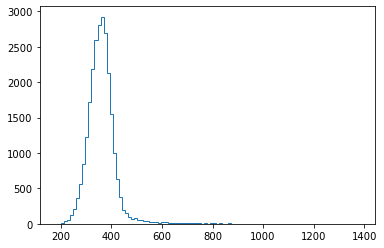

In [21]:
fig, ax = plt.subplots()
_ = hist(ax, HH.mass)

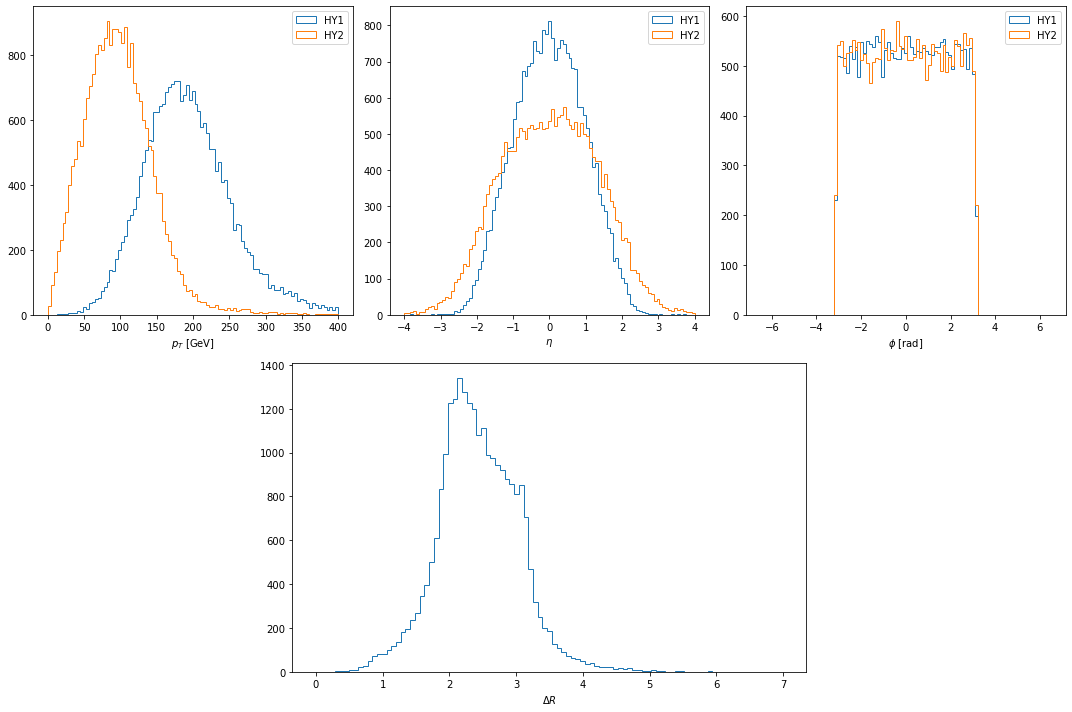

In [22]:
fig = plt.figure(figsize=(15,10))
grid = GridSpec(nrows=2, ncols=3)

pt_bins = np.linspace(0,400,100)

ax = fig.add_subplot(grid[0, 0])
hist(ax, HY1.pt,bins=pt_bins,   label='HY1')
hist(ax, HY2.pt,bins=pt_bins,  label='HY2')
ax.set_xlabel(labels_dict[0])
ax.legend()

ax = fig.add_subplot(grid[0, 1])
hist(ax, HY1.eta, bins=eta_bins,  label='HY1')
hist(ax, HY2.eta, bins=eta_bins, label='HY2')
ax.set_xlabel(labels_dict[1])
ax.legend()

ax = fig.add_subplot(grid[0, 2])
hist(ax, HY1.phi, bins=phi_bins,   label='HY1')
hist(ax, HY2.phi, bins=phi_bins,  label='HY2')
ax.set_xlabel(labels_dict[2])
ax.legend()

ax = fig.add_subplot(grid[1, :])
hist(ax, dR_HH, bins=dR_bins)
ax.set_xlabel(labels_dict[6])
ax.set_box_aspect(0.6)

grid.tight_layout(fig)

In [24]:
%run generate_features.py

-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Parsing command line arguments.
-- [INFO] -- /eos/user/s/srosenzw/miniconda3/envs/work/lib/python3.8/runpy.py -- Opening ROOT file NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_reco_preselections.root with columns
----------------------------------------------------------------------------------------------------
                                            TABLE COLUMNS                                           
----------------------------------------------------------------------------------------------------
HX_b1_recojet_m                   HX_b1_recojet_pt                  HX_b1_recojet_ptRegressed         
HX_b1_recojet_eta                 HX_b1_recojet_phi                 HX_b2_recojet_m                   
HX_b2_recojet_pt                  HX_b2_recojet_ptRegressed         HX_b2_recojet_eta                 
HX_b2_recojet_phi                 HY1_b1_recojet_m                  HY1_b1_recojet_pt             

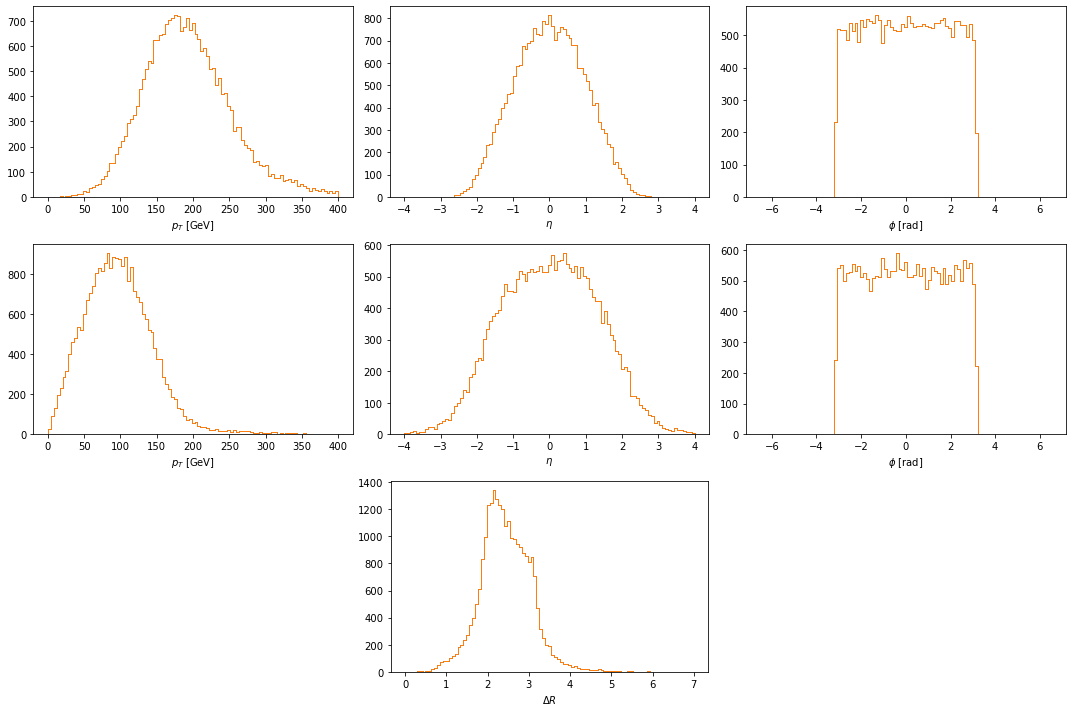

In [34]:
fig = plt.figure(figsize=(15,10))
grid = GridSpec(nrows=3, ncols=3)

pt_bins = np.linspace(0,400,100)

ax = fig.add_subplot(grid[0, 0])
hist(ax, HY1.pt,bins=pt_bins,   label='HY1')
hist(ax, X_true[:,0],bins=pt_bins,  label='HY1')
ax.set_xlabel(labels_dict[0])

ax = fig.add_subplot(grid[0, 1])
hist(ax, HY1.eta,bins=eta_bins,   label='HY1')
hist(ax, X_true[:,1],bins=eta_bins,  label='HY1')
ax.set_xlabel(labels_dict[1])

ax = fig.add_subplot(grid[0, 2])
hist(ax, HY1.phi, bins=phi_bins,   label='HY1')
hist(ax, X_true[:,2], bins=phi_bins,  label='HY2')
ax.set_xlabel(labels_dict[2])

ax = fig.add_subplot(grid[1, 0])
hist(ax, HY2.pt,bins=pt_bins,   label='HY1')
hist(ax, X_true[:,3],bins=pt_bins,  label='HY1')
ax.set_xlabel(labels_dict[0])

ax = fig.add_subplot(grid[1, 1])
hist(ax, HY2.eta,bins=eta_bins,   label='HY1')
hist(ax, X_true[:,4],bins=eta_bins,  label='HY1')
ax.set_xlabel(labels_dict[1])

ax = fig.add_subplot(grid[1, 2])
hist(ax, HY2.phi, bins=phi_bins,   label='HY1')
hist(ax, X_true[:,5], bins=phi_bins,  label='HY2')
ax.set_xlabel(labels_dict[2])

ax = fig.add_subplot(grid[2, :])
hist(ax, dR_HH, bins=dR_bins)
hist(ax, X_true[:,6], bins=dR_bins)
ax.set_xlabel(labels_dict[6])
ax.set_box_aspect(0.6)

grid.tight_layout(fig)

In [27]:
filename = 'Reco_Inputs/nn_input_MX700_MY400_reg.npz'
examples = np.load(filename)

for i,file in enumerate(examples.files):
    j = i + 1
    if j%3 > 0:
        print(file, end='\t\t\t')
    else:
        print(file)

m_test			X_train			x_train
X_val			x_val			X_test
x_test			y_train			y_test
y_val			train			val
test			

In [28]:
ntest = len(examples['test'])

In [29]:
ntest

5039

In [30]:
X_train = examples['X_train']
X_val = examples['X_val']
X_test = examples['X_test']

In [31]:
X_true = np.concatenate((X_train, X_val, X_test[:ntest,:]))

In [32]:
X_true.shape

(25195, 7)

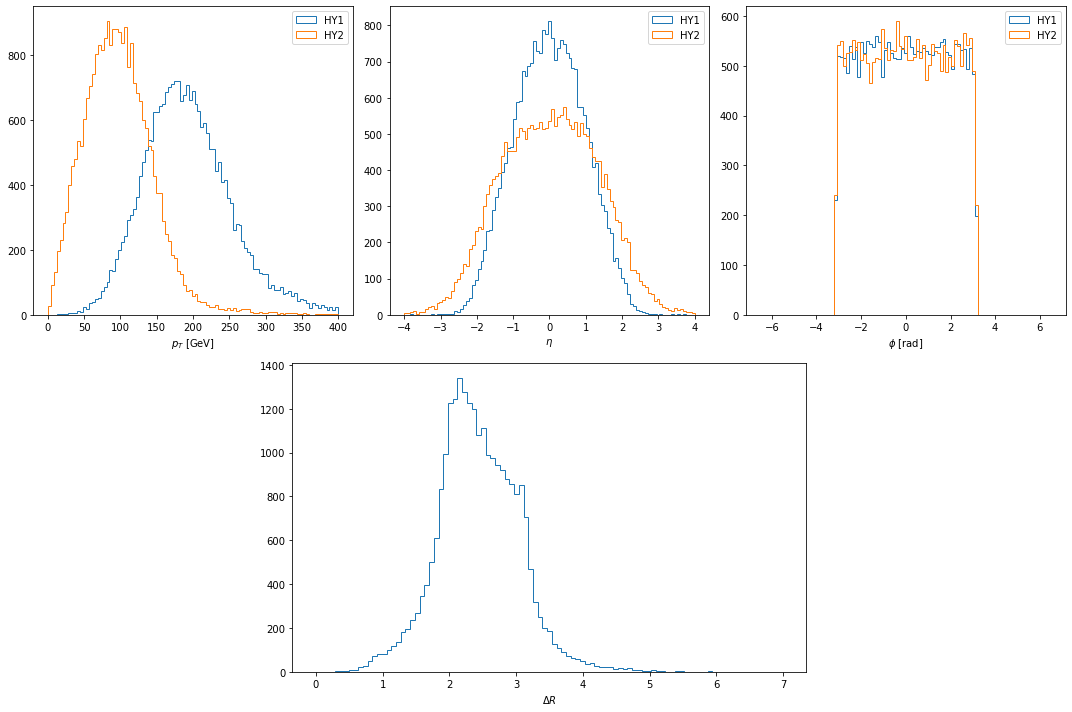

In [33]:
fig = plt.figure(figsize=(15,10))
grid = GridSpec(nrows=2, ncols=3)

pt_bins = np.linspace(0,400,100)

ax = fig.add_subplot(grid[0, 0])
hist(ax, X_true[:,0],bins=pt_bins,   label='HY1')
hist(ax, X_true[:,3],bins=pt_bins,  label='HY2')
ax.set_xlabel(labels_dict[0])
ax.legend()

ax = fig.add_subplot(grid[0, 1])
hist(ax, X_true[:,1], bins=eta_bins,  label='HY1')
hist(ax, X_true[:,4], bins=eta_bins, label='HY2')
ax.set_xlabel(labels_dict[1])
ax.legend()

ax = fig.add_subplot(grid[0, 2])
hist(ax, X_true[:,2], bins=phi_bins,   label='HY1')
hist(ax, X_true[:,5], bins=phi_bins,  label='HY2')
ax.set_xlabel(labels_dict[2])
ax.legend()

ax = fig.add_subplot(grid[1, :])
hist(ax, X_true[:,6], bins=dR_bins)
ax.set_xlabel(labels_dict[6])
ax.set_box_aspect(0.6)

grid.tight_layout(fig)